In [26]:
# Load dataset
chocolate = pd.read_excel(r"C:\Users\yfcli\anaconda_projects\cts.xlsx")

# check column names and types
print(chocolate.dtypes)

# Remove $ and commas from Amount, convert to float
chocolate['Amount'] = chocolate['Amount'].replace('[\$,]', '', regex=True).astype(float)

# Convert Date to datetime
chocolate['Date'] = pd.to_datetime(chocolate['Date'])

# Convert text columns to categorical
chocolate['Sales Person'] = chocolate['Sales Person'].astype('category')
chocolate['Country'] = chocolate['Country'].astype('category')
chocolate['Product'] = chocolate['Product'].astype('category')

# Check column types again
print(chocolate.dtypes)

Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                    int64
Boxes Shipped             int64
dtype: object
Sales Person           category
Country                category
Product                category
Date             datetime64[ns]
Amount                  float64
Boxes Shipped             int64
dtype: object


In [36]:
# Find the first and last date in the dataset
start_date = chocolate['Date'].min()
end_date = chocolate['Date'].max()
print(f"Date range: {start_date.date()} to {end_date.date()}")

# Number of countries
num_countries = chocolate['Country'].nunique()
print(f"Number of countries: {num_countries}")

# Number of salespeople
num_salespeople = chocolate['Sales Person'].nunique()
print(f"Number of salespeople: {num_salespeople}")

# Total sales by country
print(chocolate.groupby('Country')['Amount'].sum().sort_values(ascending=False)) 

# Top-performing salespeople
print(chocolate.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False), 10)

# Correlation between boxes shipped and amount
chocolate[['Amount', 'Boxes Shipped']].corr()


Date range: 2022-01-03 to 2022-08-31
Number of countries: 6
Number of salespeople: 25
Country
Australia      1137367.0
UK             1051792.0
India          1045800.0
USA            1035349.0
Canada          962899.0
New Zealand     950418.0
Name: Amount, dtype: float64
Sales Person
Ches Bonnell           320901.0
Oby Sorrel             316645.0
Madelene Upcott        316099.0
Brien Boise            312816.0
Kelci Walkden          311710.0
Van Tuxwell            303149.0
Dennison Crosswaite    291669.0
Beverie Moffet         278922.0
Kaine Padly            266490.0
Marney O'Breen         259742.0
Barr Faughny           258713.0
Roddy Speechley        251062.0
Gunar Cockshoot        238483.0
Gigi Bohling           232666.0
Karlen McCaffrey       223895.0
Jehu Rudeforth         220976.0
Jan Morforth           219667.0
Curtice Advani         216461.0
Rafaelita Blaksland    210245.0
Husein Augar           205212.0
Andria Kimpton         201747.0
Mallorie Waber         200592.0
Camilla Ca

C:\Users\yfcli\AppData\Local\Temp\ipykernel_23200\967169927.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(chocolate.groupby('Country')['Amount'].sum().sort_values(ascending=False))
C:\Users\yfcli\AppData\Local\Temp\ipykernel_23200\967169927.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(chocolate.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False), 10)


,Amount,Boxes Shipped
Amount,1.000000,-0.018827
Boxes Shipped,-0.018827,1.000000


Date
2022-01-31    896105.0
2022-02-28    699377.0
2022-03-31    749483.0
2022-04-30    674051.0
2022-05-31    752892.0
2022-06-30    865144.0
2022-07-31    803425.0
2022-08-31    743148.0
Freq: ME, Name: Amount, dtype: float64


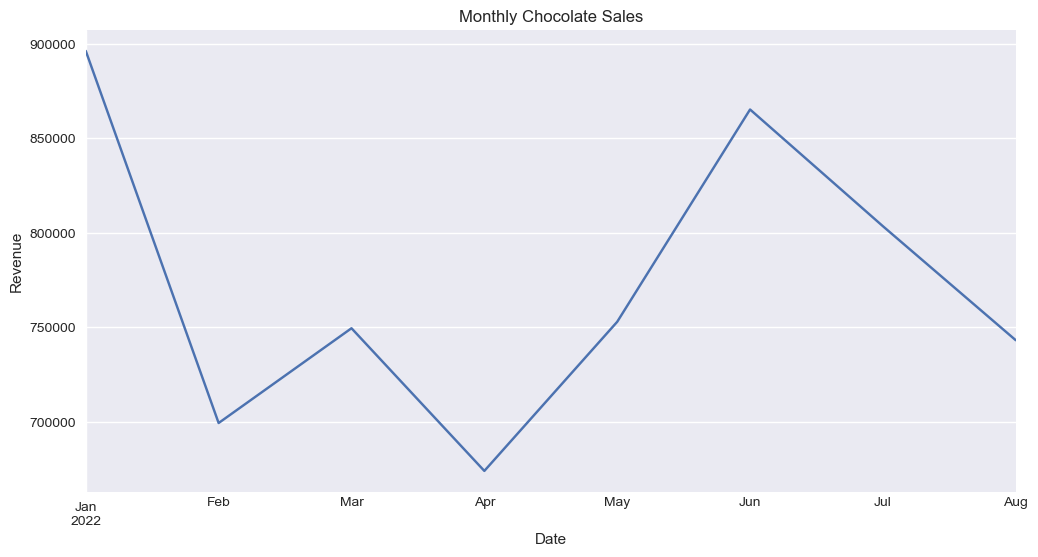

In [39]:
# Aggregate sales by month
monthly_sales = chocolate.groupby(pd.Grouper(key='Date', freq='ME'))['Amount'].sum()

print(monthly_sales)

# Plot sales trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title("Monthly Chocolate Sales")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

21:21:43 - cmdstanpy - INFO - Chain [1] start processing


21:21:44 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\yfcli\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


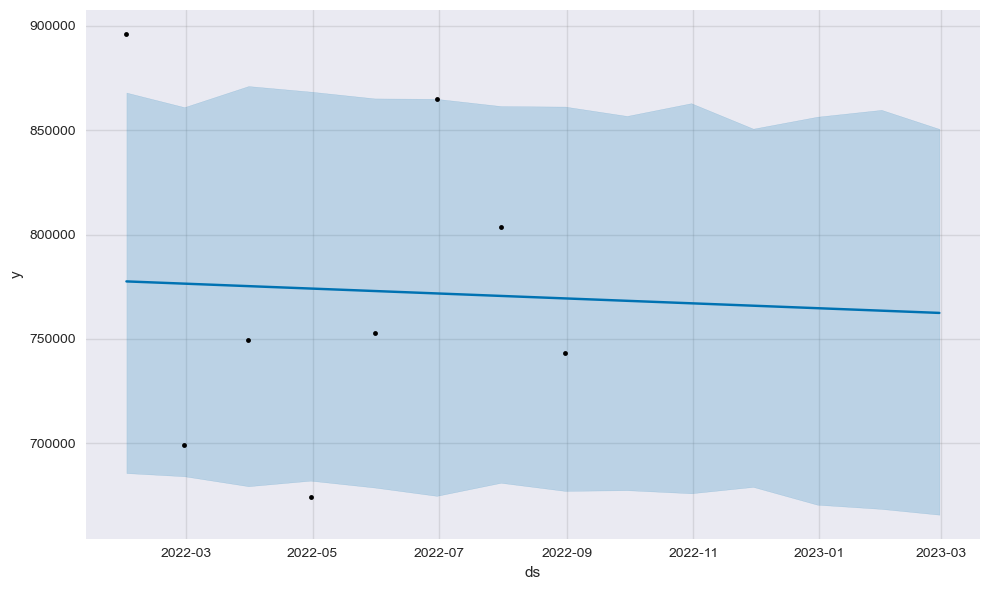

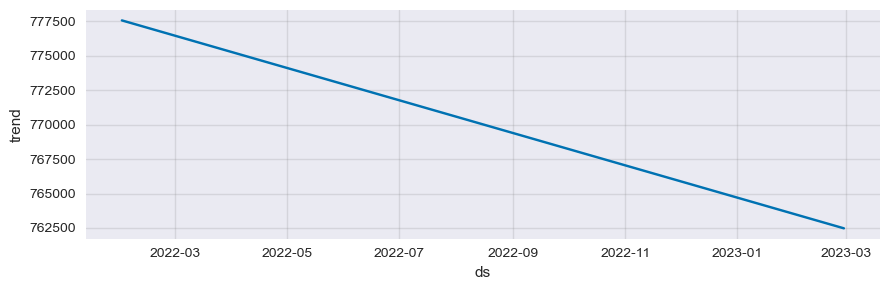

In [43]:
!pip install prophet
from prophet import Prophet

# Prophet 
df_prophet = monthly_sales.reset_index()
df_prophet.columns = ['ds', 'y']

# Fit model
model = Prophet()
model.fit(df_prophet)

# Forecast next 6 months
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)


In [ ]:
# Pareto analysis by product
product_revenue = chocolate.groupby('Product')['Amount'].sum().sort_values(ascending=False)
cumulative_share = product_revenue.cumsum() / product_revenue.sum()
print(cumulative_share.head(20))  # See top products that drive most sales


In [ ]:
# Business Insights

## Key Findings

### 1. Sales by Country
- The strongest markets are **Australia ($1.14M), UK ($1.05M), India ($1.05M), USA ($1.04M), Canada ($963K), and New Zealand ($950K)**.  
- These six countries make up the majority of revenue, highlighting them as **priority regions for marketing, logistics, and investment**.  

**Business Implication:**  
Efforts should be concentrated on these core markets while exploring strategies to expand in lower-performing regions.  

---

### 2. Sales by Salesperson
- Top performers, such as **Ches Bonnell ($321K)** and **Oby Sorrel ($317K)**, are only slightly ahead of peers.  
- Sales performance is **balanced across the team**, with no single individual dominating.  

**Business Implication:**  
Since performance is consistent, improvements will come from **system-wide sales strategies** (better product targeting, pricing, and campaigns) rather than relying on one or two “star” sellers.  

---

### 3. Relationship Between Sales and Shipments
- The correlation between **revenue and boxes shipped** is almost zero (-0.0188).  
- Revenue is not driven by volume, but rather by **product mix and pricing differences**.  

**Business Implication:**  
Some products generate **high revenue with fewer boxes** (premium items), while others are **low-margin bulk sales**. Pricing and product strategy should reflect this distinction.  

---

### 4. Monthly Sales Trends
- Sales peaked in **January 2022 ($896K)**, likely tied to **holiday demand**.  
- Sales dipped in **February and April (~$675–699K)** before recovering.  
- Forecasts suggest a **gradual downward trend**, with revenue projected around **$762K/month** moving forward.  

**Business Implication:**  
Demand appears to be **seasonal** with **holiday-driven spikes**. The downward trend indicates the need to strengthen **customer engagement and promotional strategies** to prevent revenue erosion.  

---

## 🚀 Recommended Next Steps

1. **Seasonality Analysis**  
   - Break down sales into **trend and seasonal patterns** to confirm the impact of holidays and events.  
   - Align **marketing campaigns and inventory** with these peaks.  

2. **Product Profitability Review**  
   - Identify which products generate **higher revenue per box** (premium) vs. bulk.  
   - Use insights to **optimize pricing strategy** and focus on higher-margin products.  

3. **Country–Product Targeting**  
   - Analyze which **products perform best in each market**.  
   - Helps with **localized marketing** and **stock management**.  

4. **Inventory Forecasting**  
   - Forecast **boxes shipped per product/country**, not just revenue.  
   - Improves **supply chain efficiency** and reduces risk of over/under-stocking.  

---

**Summary for Leadership:**  
Our analysis shows that revenue is concentrated in a few core markets, sales are evenly spread across the sales team, and revenue depends more on product mix than shipment size. While we see strong seasonal demand spikes, the overall revenue trend is declining.  

To address this, the business should:  
- Leverage **seasonality insights** to time campaigns and inventory,  
- Prioritize **premium, high-margin products**, and  
- Strengthen **market-specific targeting** to maximize growth in key regions.  
